<a href="https://colab.research.google.com/github/saoter/AQM2023/blob/main/Workshop%208/Kent_roy_F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="margin-top: 50px; text-align: center;">

# Kent Roy says F*


## Exploring Profanity Language in Diverse Emotional Contexts

</div>

<img src="https://i0.wp.com/subjectifymedia.com/wp-content/uploads/2023/03/roy-chelsea-4.jpg?w=1333&ssl=1"
     width="400"
      />
      

<div style="margin-top: 50px;">

## Primoz Konda, Post-doc  
### pk@business.aau.dk  

Date: October 4, 2023

</div>






In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  #used for regressions
import matplotlib.pyplot as plt #used for plotting
import seaborn as sns #used for plotting
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy.stats import norm

import warnings #ignoring warnings
warnings.filterwarnings('ignore')

In [34]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/saoter/AQM2023/main/Workshop%208/richmondway.csv')

# 1. Introduction

Television, once considered a medium for wholesome family entertainment, has transformed over the decades to accommodate a vast range of storytelling techniques and themes. This transition is mirrored in the evolution of language used on the screen, with modern TV series often incorporating profanity to add realism, intensity, or comedic value to the narrative. As content creators strive for authenticity and push the boundaries of traditional television, it begs the question: What impact does the use of profanity have on the overall reception of a show? Further, are there external influences that motivate a character's linguistic choices?

The Emmy-winning TV series "Ted Lasso" offers a compelling case study. Among the array of memorable characters, Kent Roy stands out with his proclivity for employing the expletive 'f*ck.' This term paper delves deep into the statistical patterns surrounding Kent Roy's use of this particular swear word across different episodes and seasons. By extracting and analyzing data, we aim to answer two intriguing questions, first how does the frequency of the profanity language influence the IMDb ratings, and second, how different social condiditons influence the actor's frequency of the use of profinity languge.

Through this exploration, this paper endeavors to provide insights into the nuanced relationship between language choices in modern TV series and their resonance with audiences. Additionally, by juxtaposing character-driven circumstances with linguistic patterns, we hope to offer a more profound understanding of the intricate dance between storytelling and character authenticity.


# 2. Literature review


Understanding linguistic responses during varying emotional states is pivotal as it sheds light on the intricate interplay between language and emotion. This understanding is fundamental for cognitive science and has practical applications in diverse fields such as psychotherapy, and notably, television and entertainment. TV shows, as a reflection of human interactions and society at large, often incorporate linguistic responses characteristic of particular emotional states, with swearing being one such demonstrative tool.

<cite data-cite="stephens2017does">Stephens and Zile (2017)</cite> delved into the effect of emotional arousal on swearing fluency. They found that participants exhibited enhanced swearing fluency when their emotional arousal was heightened through playing a stimulating video game compared to a calmer one. This finding has implications for TV production, where heightened emotional scenes may be more conducive to profanity-laden dialogues.

<cite data-cite="setiawan2018swear">Setiawan and Fatimatuzzahroh (2018)</cite> explored the social dynamics of swearing, highlighting that individuals tend to utter swear words, particularly when feeling angry or annoyed. This aligns with the portrayal of many TV characters who employ swear words as a verbal vent during emotionally turbulent scenarios.


<cite data-cite="stapleton201012">Stapleton (2010)</cite> explored the semantic weight of swear words. He emphasized their ability to amplify conveyed emotional intensity, which is a tool frequently leveraged in television to add depth and gravitas to scenes.

Taking a slight tangent, Stephens, Atkins, and Kingston (2009) investigated swearing's physiological effects, discovering that it augmented the pain threshold and tolerance. This highlights the dual role swearing plays: both as a reflection of internal emotional states and as a coping mechanism during distressing experiences. Given this, TV series like "Ted Lasso" could be employing swearing not just for authenticity, but as a tool for characters to navigate their emotional landscape.

Additionally, in the world of television and entertainment, swearing is often employed to construct authentic character portrayals and narrative realism. The modern viewer, more than ever, craves authentic storytelling, where characters reflect real-world emotions and reactions. Jay (2009) in his work, "Why We Curse," posits that television, as a mirror to society, has seen an uptick in profanity as a means to cater to this desire for authenticity, realism, and a true reflection of societal language norms.

In summation, the literature distinctly illuminates the multifaceted relationship between swearing and emotional states, portraying swearing as both an instinctive linguistic response and a coping conduit during emotionally charged moments. These insights find particular resonance in the TV and entertainment industry, as shows continuously strive for genuine emotional connections with their audience through authentic linguistic portrayals.


# 3. Data and Methods

## 3.1 Ted Lasso (Tv Series)

The data was collected by Deepsha Menghani and published on her GitHub account <cite data-cite="menghani_richmondway_2023">(Menghani, 2023)</cite>. It is based on Tv-series Ted Lasso with the following plot: From American college football coach Ted Lasso heads to London to manage AFC Richmond, a struggling English Premier League soccer team. One Character Kent Roy is very eager to say the F* word. This dataset includes variables about him saying F* word in each episode.



## 3.2 Column description:

| **variable**          	| **class** 	| **description**                                                                                                              	|
|-----------------------	|-----------	|------------------------------------------------------------------------------------------------------------------------------	|
| **Character**         	| object 	| Character single value - Roy Kent                                                                                            	|
| **Episode_order**     	| int64    	| The order of the episodes from the first to the last                                                                         	|
| **Season**            	| int64    	| The season 1, 2 or 3 associated with the count                                                                               	|
| **Episode**           	| int64    	| The episode within the season associated with the count                                                                      	|
| **Season_Episode**    	| int64 	| Season and episode as a combined variable                                                                                    	|
| **F_count_RK**        	| int64    	| Roy Kent's F-ck count in that season and episode                                                                             	|
| **F_count_total**     	| int64    	| Total F-ck count by all characters combined including Roy Kent in that season and episode                                    	|
| **cum_rk_season**     	| int64    	| Roy Kent's cumulative F-ck count within that season                                                                          	|
| **cum_total_season**  	| int64    	| Cumulative total F-ck count by all characters combined including Roy Kent within that season                                 	|
| **cum_rk_overall**    	| int64    	| Roy Kent's cumulative F-ck count across all episodes and seasons until that episode                                          	|
| **cum_total_overall** 	| int64    	| Cumulative total F-ck count by all characters combined including Roy Kent across all episodes and seasons until that episode 	|
| **F_score**           	| float64    	| Roy Kent's F-count divided by the total F-count in the episode                                                               	|
| **F_perc**            	| float64    	| F-score as percentage                                                                                                        	|
| **Dating_flag**       	| object 	| Flag of yes or no for whether during the episode Roy Kent was dating the characted Keeley                                    	|
| **Coaching_flag**     	| object 	| Flag of yes or no for whether during the episode Roy Kent was coaching the team                                              	|
| **Imdb_rating**       	| float64    	| Imdb rating of that episode                                                                                                  	|

Based on the research interest, we decided to select eight columns and create an additional column **F_more_than_7** that flags yes or no for wheather during the epsiode Roy Kent used the F* term more than 7 times. In addition, to lower the simislarity with existing statistical term, we renamed **F_score** variable into **Fck_score**.

In order to align with the requirements of the subsequent analysis, the data types of four columns in the dataset were converted to 'category'.



In [35]:
columns_to_include = ['Season_Episode', 'Season', 'F_count_RK', 'F_count_total', 'F_score', 'Dating_flag', 'Coaching_flag', 'Imdb_rating']
df = df[columns_to_include]
df['F_more_than_7'] = pd.Series(np.where(df['F_count_RK'] > 7, 'Yes', 'No'))
df.rename(columns={'F_score': 'Fck_score'}, inplace=True)

In [36]:
# objects to cagegory
columns_to_category = ['F_more_than_7', 'Dating_flag', 'Coaching_flag', 'Season']
for i in columns_to_category:
    df[i] = pd.Series(df[i]).astype('category')

print(df.dtypes)

Season_Episode      object
Season            category
F_count_RK           int64
F_count_total        int64
Fck_score          float64
Dating_flag       category
Coaching_flag     category
Imdb_rating        float64
F_more_than_7     category
dtype: object


In [64]:
df.head()

,Season_Episode,Season,F_count_RK,F_count_total,Fck_score,Dating_flag,Coaching_flag,Imdb_rating,F_more_than_7,Dating_dummy,Coaching_dummy,F_more_than_7_binary
0,S1_e1,1,2,13,0.153846,No,No,7.8,No,0,0,0
1,S1_e2,1,2,8,0.250000,No,No,8.1,No,0,0,0
2,S1_e3,1,7,13,0.538462,No,No,8.5,No,0,0,0
3,S1_e4,1,8,17,0.470588,No,No,8.2,Yes,0,0,1
4,S1_e5,1,4,13,0.307692,No,No,8.9,No,0,0,0


My final dataset used in the anlaysis contained 9 columns, among them 4 categorical, 2 integer, 3 float and one variable as a string. Finally, we inspected the final dataset for potential missing values and described the numeric variables.

In [38]:
# Check for missing values
missing_values = df.isnull().sum()

# Basic statistics for numerical columns
stats = df.describe()

missing_values, stats


(Season_Episode    0
 Season            0
 F_count_RK        0
 F_count_total     0
 Fck_score         0
 Dating_flag       0
 Coaching_flag     0
 Imdb_rating       0
 F_more_than_7     0
 dtype: int64,
        F_count_RK  F_count_total  Fck_score  Imdb_rating
 count   34.000000      34.000000  34.000000    34.000000
 mean     8.823529      21.823529   0.395635     8.332353
 std      5.627156      11.532485   0.150134     0.657230
 min      2.000000       6.000000   0.153846     6.600000
 25%      5.000000      13.000000   0.282609     8.025000
 50%      7.500000      18.000000   0.357026     8.500000
 75%     12.750000      29.000000   0.504744     8.775000
 max     23.000000      46.000000   0.718750     9.400000)

## 3.3 Summarization

We don't have any missing values, whicih allow us to use the whole dataset, without considering them. With only 34 datapoints, this is a rather small dataset, so we want to include all of them without filtering.

## 3.4. Vizualization

At first glance, we find interest in four columns:

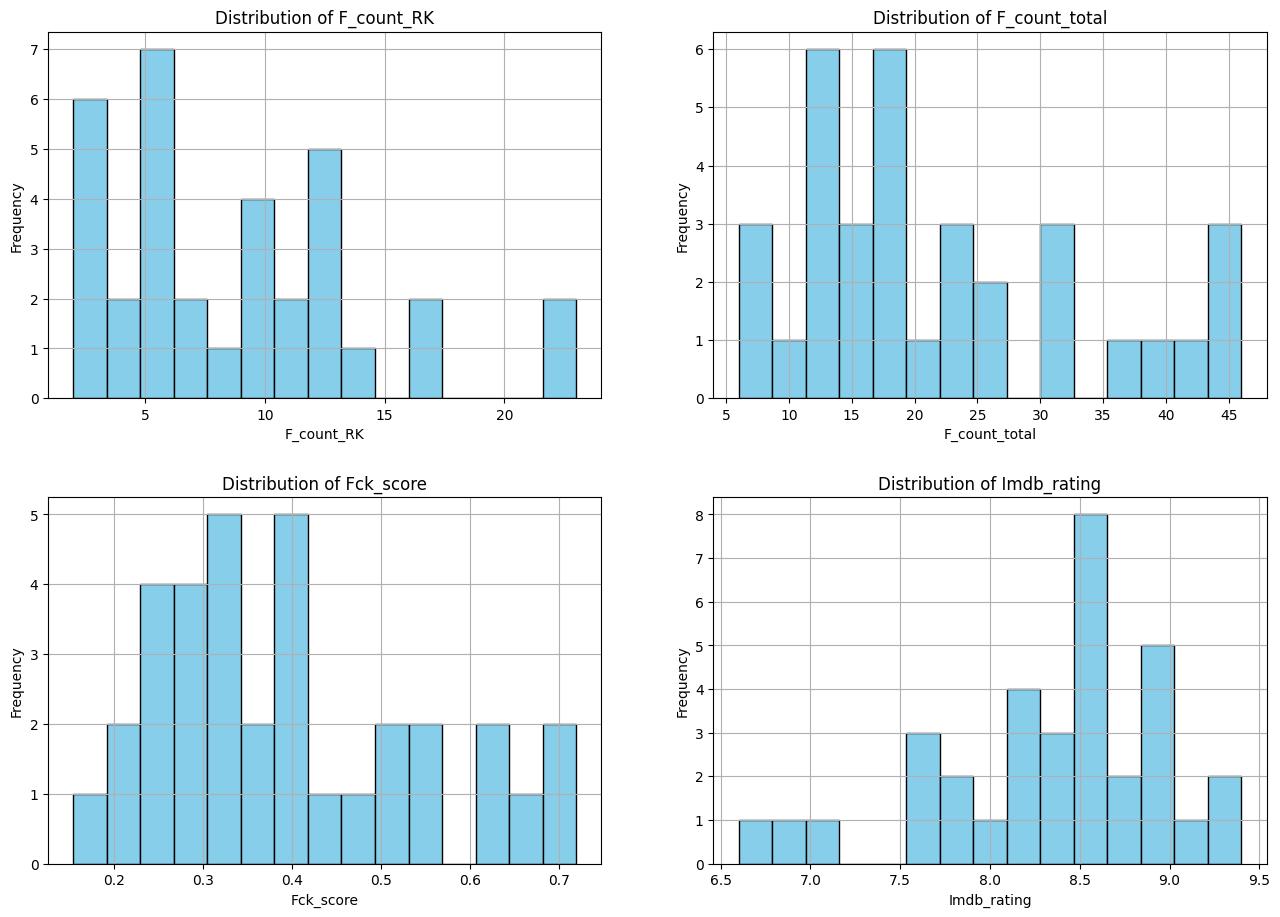

In [39]:
# Define a list of columns to visualize
columns_to_viz = ["F_count_RK", "F_count_total", "Fck_score", "Imdb_rating"]

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

# Loop through each column to create histograms
for i, col in enumerate(columns_to_viz):
    ax = axs[i//2, i%2]
    df[col].hist(ax=ax, bins = 15, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

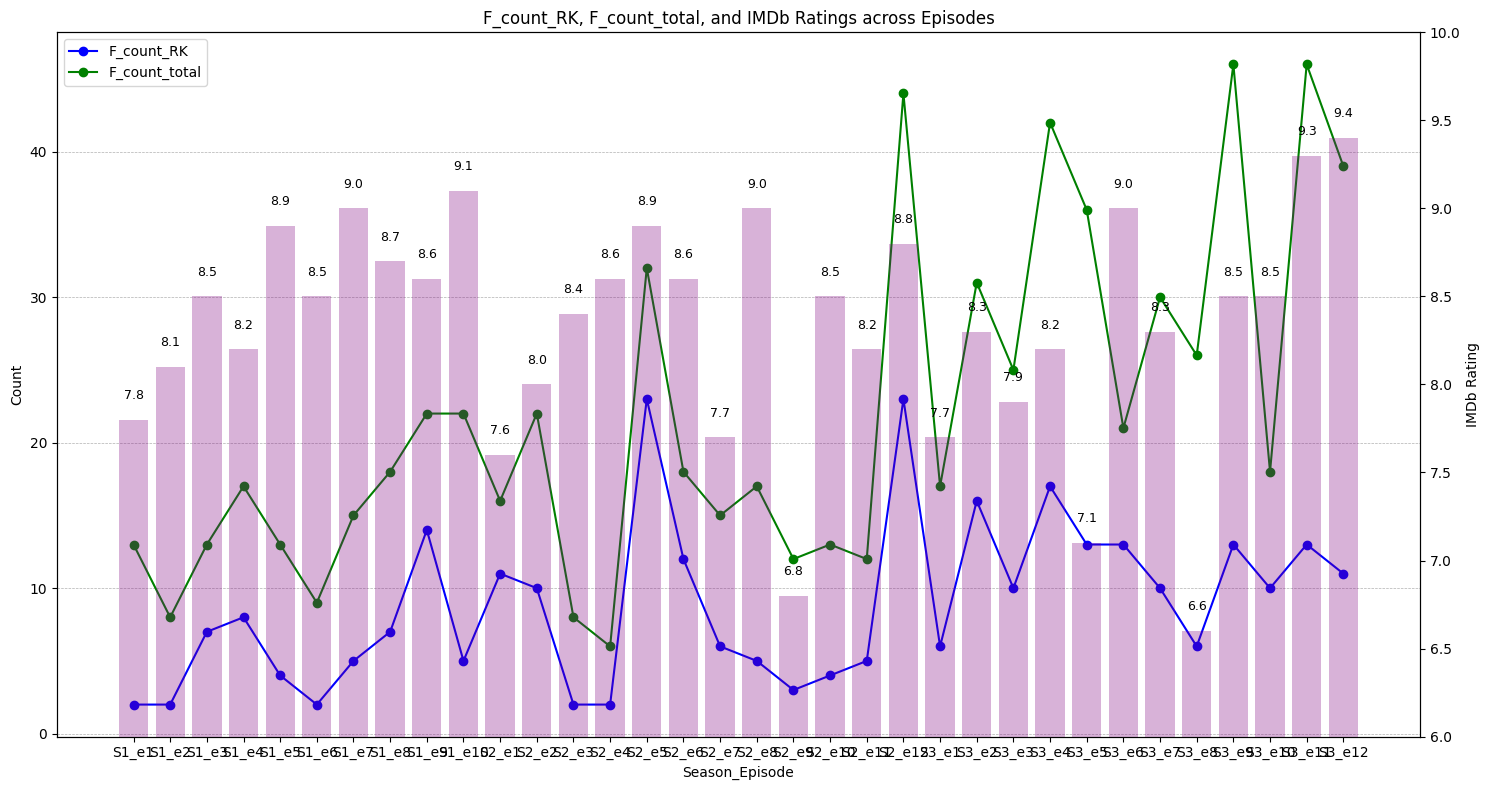

In [40]:
# Set up the figure and primary axis
fig, ax1 = plt.figure(figsize=(15, 8)), plt.gca()

# Plotting F_count_RK and F_count_total on the primary y-axis
ax1.plot(df['Season_Episode'], df['F_count_RK'], marker='o', label='F_count_RK', color='blue')
ax1.plot(df['Season_Episode'], df['F_count_total'], marker='o', label='F_count_total', color='green')

# Setting labels, title, and grid for primary y-axis
ax1.set_xlabel('Season_Episode')
ax1.set_ylabel('Count')
ax1.set_title('F_count_RK, F_count_total, and IMDb Ratings across Episodes')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
ax1.legend(loc='upper left')

# Create a secondary y-axis for IMDb rating
ax2 = ax1.twinx()

# Plotting IMDb ratings as bars on the secondary y-axis
bars = ax2.bar(df['Season_Episode'], df['Imdb_rating'], color='purple', label='IMDb Rating', alpha=0.3)

# Setting the range of the secondary y-axis
ax2.set_ylim([6, 10])

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=9)

# Setting label for secondary y-axis
ax2.set_ylabel('IMDb Rating')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)
plt.tight_layout()

# Show the combined plot
plt.show()


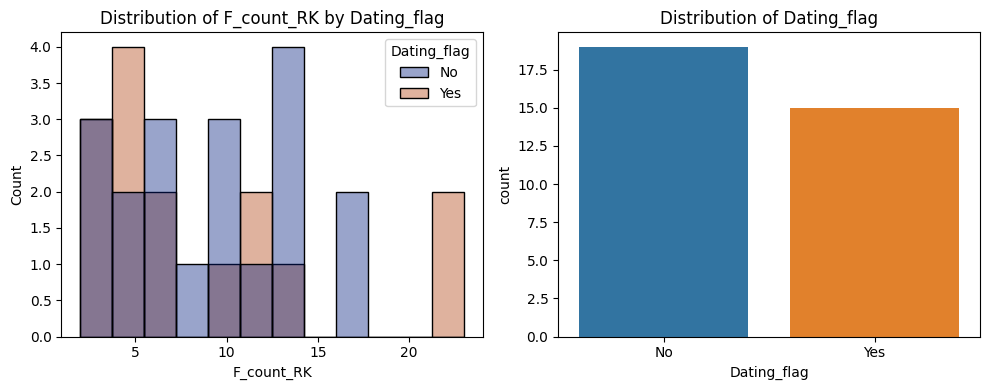

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns of subplots, with a figure size of 15x7 inches

# Plotting F_count_RK for Dating_flag on the first subplot
sns.histplot(data=df, x='F_count_RK', hue='Dating_flag', bins=12, alpha=0.4, palette="dark", ax=axs[0])
axs[0].set_title('Distribution of F_count_RK by Dating_flag')  # Optional title for the first subplot

# Plotting the distribution of values in Dating_flag on the second subplot
sns.countplot(data=df, x='Dating_flag', ax=axs[1])
axs[1].set_title('Distribution of Dating_flag')  # Optional title for the second subplot

plt.tight_layout()  # Adjusts the layout so that plots do not overlap
plt.show()

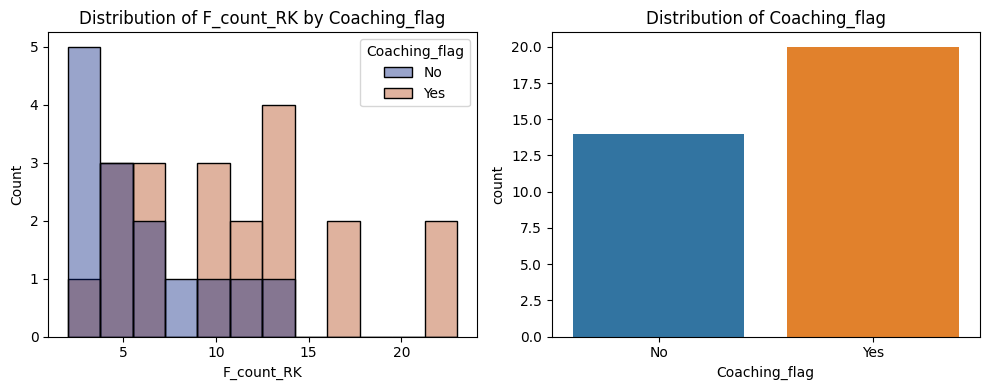

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns of subplots, with a figure size of 15x7 inches

# Plotting F_count_RK for Coaching_flag on the first subplot
sns.histplot(data=df, x='F_count_RK', hue='Coaching_flag', bins=12, alpha=0.4, palette="dark", ax=axs[0])
axs[0].set_title('Distribution of F_count_RK by Coaching_flag')  # Optional title for the first subplot

# Plotting the distribution of values in Coaching_flag on the second subplot
sns.countplot(data=df, x='Coaching_flag', ax=axs[1])
axs[1].set_title('Distribution of Coaching_flag')  # Optional title for the second subplot

plt.tight_layout()  # Adjusts the layout so that plots do not overlap
plt.show()

## 3.5 Methods


For this study, a series of statistical analyses were conducted to delve into the patterns and relationships within the dataset. The methods employed were chosen based on the nature of the data and the research questions posed.

#### **Comparison of Means between Two Populations:**
To ascertain any significant differences in the swear word 'f*ck' usage by Kent Roy under different social conditions, we compared the means of the two populations using the following formula:

$$ t = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\left(\frac{{s_p^2}}{{n_1}}\right) + \left(\frac{{s_p^2}}{{n_2}}\right)}}} $$

Where:
- $ \bar{X}_1 $ and $ \bar{X}_2 $ are the sample means of the two populations.
- $ s^2_p $ and $ s^2_p $ are the sample variances.
- $ n_1 $ and $ n_2 $ are the sample sizes.


#### **Multiple Linear Regression:**
To consider the effect of multiple predictors on the dependent variable, a multiple linear regression analysis was employed:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \varepsilon $$

Where:
- $ Y $ is the dependent variable.
- $ \beta_0 $ is the intercept.
- $ \beta_1, \beta_2, \dots \beta_p $ are the coefficients of the predictors.
- $ X_1, X_2, \dots X_p $ are the predictor variables.
- $ \varepsilon $ is the error term.

#### **Logistic Regression:**
For situations where the dependent variable was binary, logistic regression was used. The basic logistic regression equation is:

$$ \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \dots + \beta_pX_p $$

Where:
- $ p $ is the probability of the dependent event occurring.
- $ \beta_0 $ is the intercept.
- $ \beta_1, \beta_2, \dots \beta_p $ are the coefficients of the predictors.
- $ X_1, X_2, \dots X_p $ are the predictor variables.


# 4. Analysis


#### Correlation matrix

               F_count_RK  F_count_total  Fck_score  Imdb_rating
F_count_RK       1.000000       0.787257   0.654487     0.206433
F_count_total    0.787257       1.000000   0.112693     0.170292
Fck_score        0.654487       0.112693   1.000000     0.140007
Imdb_rating      0.206433       0.170292   0.140007     1.000000


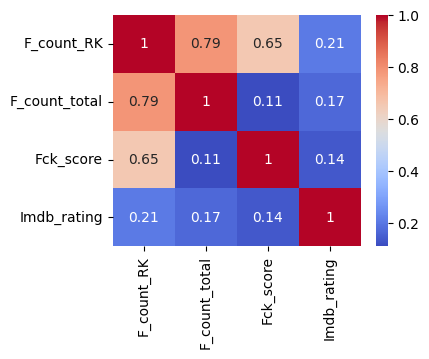

In [43]:
# Selecting numerical variables (both integers and floats)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Creating a correlation matrix
correlation_matrix = numerical_df.corr()

print(correlation_matrix)
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix shows high correlation between three variables that are dealing with the use of word F*. They are all connected, thus this would be expected. IMDb rating, on the other hand, shows very low correlation with them.

## 4.1 Does relationship status significanly influence actor's use of profenity language?



**Null Hypothesis**: The mean profanity count when the actor is dating is equal to the mean profanity count when the actor is not dating. This means that the relationship status has no effect on the actor's use of profanity language.


**Alternative Hypothesis**: The mean profanity count when the actor is dating is not equal to the mean profanity count when the actor is not dating. This suggests that the relationship status does have an effect on the actor's use of profanity language.

$$ \mu_{dating} - \mu_{not dating} = 0 $$
$$ \mu_{dating} - \mu_{not dating} \neq 0 $$


In [66]:
summary = df.groupby('Dating_flag')['F_count_RK'].describe()

summary

,count,mean,std,min,25%,50%,75%,max
Dating_flag,,,,,,,,
No,19.0,8.842105,4.681680,2.0,5.5,10.0,13.0,17.0
Yes,15.0,8.800000,6.815948,2.0,4.5,6.0,11.5,23.0


#### Is Variances in Dating Equal?



In [67]:
# Splitting the data into two groups based on 'Dating_flag'
group1 = df[df['Dating_flag'] == 'No']['F_count_RK']
group2 = df[df['Dating_flag'] == 'Yes']['F_count_RK']

var_group1_dating = group1.var()
var_group2_dating = group2.var()

F_statistic_dating = var_group1_dating / var_group2_dating

print("F statistice is",F_statistic_dating)

F statistice is 0.4717924372226178


In [68]:
# Degrees of freedom for 'Dating_flag'
df1_dating = len(group1) - 1
df2_dating = len(group2) - 1

# Calculate critical values for alpha = 0.05
alpha = 0.05
lower_critical_dating = f.ppf(alpha/2, df1_dating, df2_dating)
upper_critical_dating = f.ppf(1 - alpha/2, df1_dating, df2_dating)

print("The critical values of the F-Distrbutions are",lower_critical_dating, " and ", upper_critical_dating)

The critical values of the F-Distrbutions are 0.3708606066289666  and  2.87948341928767


Our computed F-statistic for Dating_flag was 0.4718, which falls within the range defined by the critical values. This means that we fail to reject the null hypothesis for Dating_flag and cannot conclude that the variances are different.

In [69]:
# Perform t-test for independent samples with equal variances for 'Dating_flag'
t_stat_dating_equal_var, p_value_dating_equal_var = ttest_ind(group1, group2, equal_var=True)

print("T-statistic for Dating is", t_stat_dating_equal_var)
print("P-value for Dating is", p_value_dating_equal_var)

T-statistic for Dating is 0.021332979366834565
P-value for Dating is 0.9831125050716911


#### Interpretation
The p-value of 0.9839 is much greater than the commonly used significance level of 0.05. Based on the p-value, we fail to reject the null hypothesis. This means there is no statistically significant difference in the mean count of Kent Roy saying the F-word when he is dating versus when he is not dating.

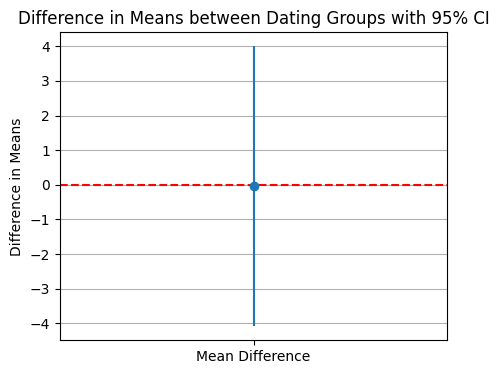

In [70]:
# Calculate means for both groups
mean_group1 = group1.mean()
mean_group2 = group2.mean()

# Calculate the standard error for both groups
se_group1 = group1.std() / np.sqrt(len(group1))
se_group2 = group2.std() / np.sqrt(len(group2))

# Calculate the difference in means
mean_diff = mean_group2 - mean_group1

# Calculate the standard error of the difference in means
se_diff = np.sqrt(se_group1**2 + se_group2**2)

# Calculate 95% CI for mean difference using the t-distribution
ci_lower = mean_diff - 1.96 * se_diff
ci_upper = mean_diff + 1.96 * se_diff

# Plot the mean difference with 95% CI
plt.figure(figsize=(5, 4))
plt.errorbar(['Mean Difference'], [mean_diff], yerr=[[mean_diff - ci_lower], [ci_upper - mean_diff]], fmt='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference in Means between Dating Groups with 95% CI')
plt.ylabel('Difference in Means')
plt.grid(axis='y')
plt.show()

## 4.2 Does coaching status significanly influence actor's use of profenity language?

**Null Hypothesis**: The mean profanity count when the actor is coaching is equal to the mean profanity count when the actor is not coaching. This means that the coaching status has no effect on the actor's use of profanity language.


**Alternative Hypothesis**: The mean profanity count when the actor is coaching is not equal to the mean profanity count when the actor is not coaching. This suggests that the coaching status does have an effect on the actor's use of profanity language.

$$ \mu_{coaching} - \mu_{not coaching} = 0 $$
$$ \mu_{coaching} - \mu_{not coaching} \neq 0 $$


In [49]:
summary = df.groupby('Coaching_flag')['F_count_RK'].describe()

summary

,count,mean,std,min,25%,50%,75%,max
Coaching_flag,,,,,,,,
No,14.0,5.785714,3.886437,2.0,2.0,5.0,7.75,14.0
Yes,20.0,10.950000,5.753489,3.0,6.0,10.5,13.00,23.0


#### Is Variances in Coaching Equal?


In [71]:
# Splitting the data into two groups based on 'Coaching_flag'
group1 = df[df['Coaching_flag'] == 'No']['F_count_RK']
group2 = df[df['Coaching_flag'] == 'Yes']['F_count_RK']

var_group1_coaching = group1.var()
var_group2_coaching = group2.var()

F_statistic_coaching = var_group1_coaching / var_group2_coaching

print("F statistice is",F_statistic_coaching)


F statistice is 0.456289874367623


In [72]:
# Degrees of freedom for 'Coaching_flag'
df1_coaching = len(group1) - 1
df2_coaching = len(group2) - 1

# Calculate critical values for alpha = 0.05
alpha = 0.05
lower_critical_coaching = f.ppf(alpha/2, df1_coaching, df2_coaching)
upper_critical_coaching = f.ppf(1 - alpha/2, df1_coaching, df2_coaching)

print("The critical values of the F-Distrbutions are",lower_critical_coaching, " and ", upper_critical_coaching)


The critical values of the F-Distrbutions are 0.337314664520372  and  2.680778325219472


Our computed F-statistic for Coaching_flag was 0.4562, which falls within the range defined by the critical values. This means that we fail to reject the null hypothesis for Coaching_flag and cannot conclude that the variances are different.

In [73]:
# Perform t-test for independent samples with equal variances for 'Coaching_flag'
t_stat_coaching_equal_var, p_value_coaching_equal_var = ttest_ind(group1, group2, equal_var=True)

print("T-statistic for Coaching is", t_stat_coaching_equal_var)
print("P-value for Coaching is", p_value_coaching_equal_var)


T-statistic for Coaching is -2.9182131222024776
P-value for Coaching is 0.006393179974946061


#### Interpretation
The p-value is less than 0.05, indicating that there is a statistically significant difference in the mean of 'F_count_RK' based on the 'Coaching_flag'. Thus we can reject the null hypothesis. This indicates that there is a statistically significant difference in the mean count of Kent Roy saying the F-word when he is coaching versus when he is not coaching. Specifically, he tends to say the F-word more frequently when he is coaching.

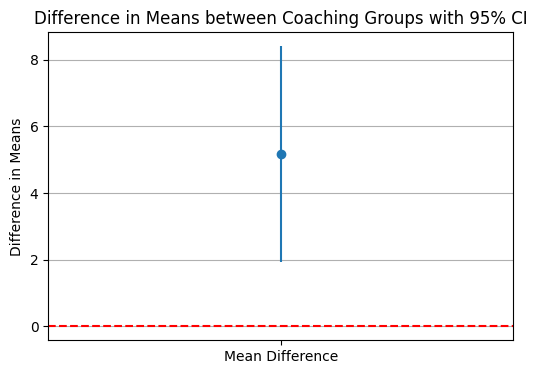

In [74]:
# Calculate means for both groups
mean_group1 = group1.mean()
mean_group2 = group2.mean()

# Calculate the standard error for both groups
se_group1 = group1.std() / np.sqrt(len(group1))
se_group2 = group2.std() / np.sqrt(len(group2))

# Calculate the difference in means
mean_diff = mean_group2 - mean_group1

# Calculate the standard error of the difference in means
se_diff = np.sqrt(se_group1**2 + se_group2**2)

# Calculate 95% CI for mean difference using the t-distribution
ci_lower = mean_diff - 1.96 * se_diff
ci_upper = mean_diff + 1.96 * se_diff

# Plot the mean difference with 95% CI
plt.figure(figsize=(6, 4))
plt.errorbar(['Mean Difference'], [mean_diff], yerr=[[mean_diff - ci_lower], [ci_upper - mean_diff]], fmt='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference in Means between Coaching Groups with 95% CI')
plt.ylabel('Difference in Means')
plt.grid(axis='y')
plt.show()

## 4.3 How the use or profanity language, dating status and coaching status influence episodes' IMDb rating?

In [55]:

# Convert categorical variables to dummy variables (0 and 1)
df['Dating_dummy'] = df['Dating_flag'].map({'No': 0, 'Yes': 1})
df['Coaching_dummy'] = df['Coaching_flag'].map({'No': 0, 'Yes': 1})

df.head()

,Season_Episode,Season,F_count_RK,F_count_total,Fck_score,Dating_flag,Coaching_flag,Imdb_rating,F_more_than_7,Dating_dummy,Coaching_dummy
0,S1_e1,1,2,13,0.153846,No,No,7.8,No,0,0
1,S1_e2,1,2,8,0.250000,No,No,8.1,No,0,0
2,S1_e3,1,7,13,0.538462,No,No,8.5,No,0,0
3,S1_e4,1,8,17,0.470588,No,No,8.2,Yes,0,0
4,S1_e5,1,4,13,0.307692,No,No,8.9,No,0,0


In [56]:
# Define independent variables (including an intercept) and dependent variable
X = df[['F_count_RK', 'Dating_dummy', 'Coaching_dummy']]
X = sm.add_constant(X)  # Adding the constant term for the intercept
y = df['Imdb_rating']

# Perform linear regression
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:            Imdb_rating   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.158
Date:                Tue, 10 Oct 2023   Prob (F-statistic):              0.342
Time:                        09:31:46   Log-Likelihood:                -31.604
No. Observations:                  34   AIC:                             71.21
Df Residuals:                      30   BIC:                             77.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.1902      0.243     33.

#### Interpratation

**R-squared:** This is 0.104, which means that only 10.4% of the variability in Imdb_rating is explained by the independent variables in the model. This is a relatively low value, implying that there are other factors (not included in this model) that influence the Imdb_rating.

**F-statistic & Prob (F-statistic)**: The F-statistic is 1.158 with a p-value of 0.342. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that all the coefficients (excluding the intercept) are equal to zero. This means that, as a whole, the predictors in the model aren't significantly explaining the variability in Imdb_rating.

**const (Intercept)**: The intercept is 8.1902, which means that when all predictors are 0, the expected IMDb rating is 8.1902.
F_count_RK: The coefficient is 0.0388, suggesting that for every additional unit of F_count_RK, the IMDb rating increases by 0.0388 units, holding all else constant. The p-value is 0.098, which is slightly above the 0.05 significance level. This means the effect of F_count_RK on IMDb rating is borderline significant.

**Dating_dummy**: The coefficient is 0.0275, which means that when the actor is dating (i.e., the dummy variable is 1), the IMDb rating increases by 0.0275 units compared to when the actor is not dating, all else being equal. However, the p-value is 0.904, which is way above the 0.05 threshold, indicating that this effect is not statistically significant.

**Coaching_dummy**: The coefficient is -0.3613, suggesting that when the actor is coaching, the IMDb rating decreases by 0.3613 units compared to when the actor is not coaching, all else being equal. However, the p-value is 0.171, which is slightly above the 0.05 threshold, indicating that this effect is not statistically significant.

**F_count_RK**: The coefficient is 0.0388. This means that for every one-unit increase in use of F word, the dependent variable (Imdb_rating) is expected to increase by 0.0388 units, holding all other variables constant. The p-value is 0.098, which is much lower than in other two dependant variables, yet higher than the threshold. Thus, we cannot conclude that it significantly influence the IMDb rating.

In conclusion, the model has a low explanatory power, with an adjusted R-squared of just 1.4%. The predictors (F_count_RK, Dating_dummy, and Coaching_dummy) are not statistically significant at conventional levels in explaining the variation in 'Imdb_rating'.

$$ \text{Imdb_rating} = 8.1902 + 0.0388 \times \text{F_count_RK} + 0.0275 \times \text{Dating_dummy} - 0.3613 \times \text{Coaching_dummy} $$


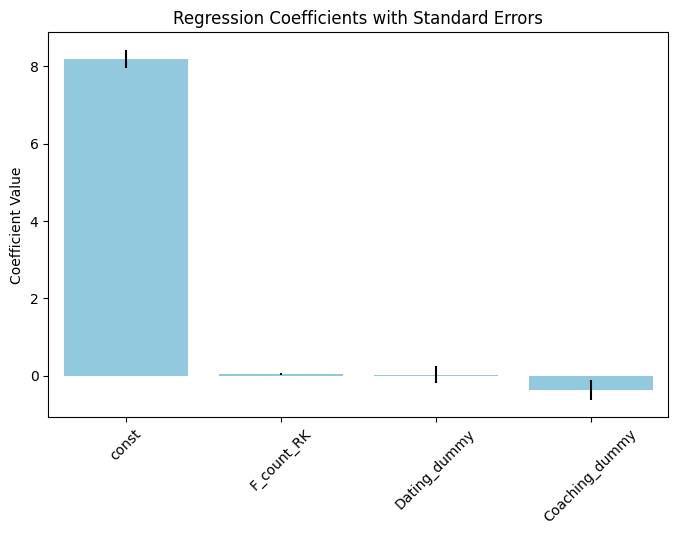

In [57]:
# Extract coefficients and standard errors
coefficients = model.params
errors = model.bse

# Create a coefficient plot
plt.figure(figsize=(8,5))
sns.barplot(x=coefficients.index, y=coefficients.values, yerr=errors.values, color="skyblue")
plt.xticks(rotation=45)
plt.title('Regression Coefficients with Standard Errors')
plt.ylabel('Coefficient Value')
plt.show()

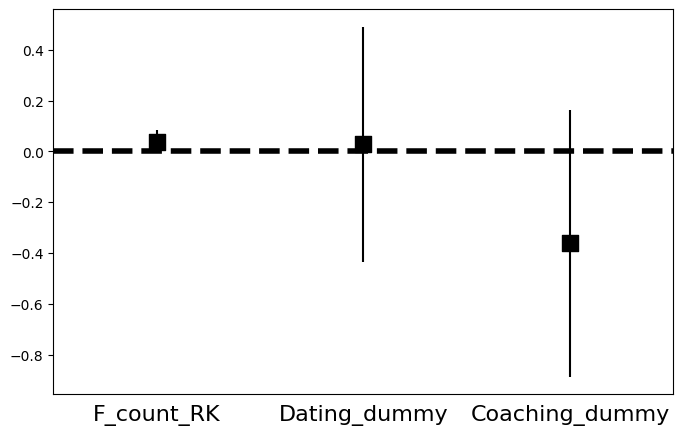

In [58]:
err_series = model.params - model.conf_int()[0]
coef_df = pd.DataFrame({'coef': model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar',
             ax=ax, color='none',
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]),
           marker='s', s=120,
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['F_count_RK', 'Dating_dummy', 'Coaching_dummy'],
                       rotation=0, fontsize=16)

# 4.4 Does the dating or coaching status of an actor influence the likelihood of a specific profanity word being used more than 7 times in a TV episode?

In [59]:
# Logistic Regression

# Convert 'F_more_than_7' to binary format
df['F_more_than_7_binary'] = df['F_more_than_7'].map({'No': 0, 'Yes': 1})

# Define the independent variables (including an intercept) and dependent variable
X_logistic = df[['Dating_dummy', 'Coaching_dummy']]
X_logistic = sm.add_constant(X_logistic)  # Adding the constant term for the intercept
y_logistic = df['F_more_than_7_binary']

# Perform logistic regression
logistic_model = sm.Logit(y_logistic, X_logistic).fit()

# Get the summary of the logistic regression
logistic_summary = logistic_model.summary()
print(logistic_summary)

Optimization terminated successfully.
         Current function value: 0.615492
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     F_more_than_7_binary   No. Observations:                   34
Model:                            Logit   Df Residuals:                       31
Method:                             MLE   Df Model:                            2
Date:                  Tue, 10 Oct 2023   Pseudo R-squ.:                  0.1120
Time:                          09:31:47   Log-Likelihood:                -20.927
converged:                         True   LL-Null:                       -23.567
Covariance Type:              nonrobust   LLR p-value:                   0.07134
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6076      0.679     -0.895      0.371      -1.938       0.723
D

#### Interpretation

**Pseudo R-squared**: This is an analogous measure to the R-squared in OLS regression for logistic regression, but it does not have the same interpretation. A value of 0.1120 means the model provides some explanation, but generally, pseudo R-squared values tend to be lower than R-squared values from OLS regressions.

**LLR p-value:** This is the likelihood ratio test comparing the fit of our model to the null model. A p-value of 0.07134 is just above the conventional 0.05 threshold for significance, suggesting that the model is on the edge of being significant in explaining the likelihood of the profanity word being used more than 7 times.

**const (Intercept)**: This is the log-odds of the outcome happening when all predictors are zero. Here, it's -0.6076. This is not statistically significant at the conventional level (p=0.371).

**Dating_dummy**: The coefficient of -0.6649 implies that if the actor is dating, the log odds of the profanity word being used more than 7 times is decreased by this value. However, this effect is not statistically significant (p=0.375).

**Coaching_dummy**: The coefficient of 1.5077 implies that if the actor is coaching, the log odds of the profanity word being used more than 7 times is increased by this value. This effect is statistically significant at the 0.05 level (p=0.048).

In conclusion, the logistic regression model suggests that the coaching status of an actor has a significant effect on the likelihood of a specific profanity word being used more than 7 times in a TV episode, while the dating status does not have a significant impact. Specifically, if an actor is coaching, the episode is more likely to have the profanity word used more than 7 times compared to if they're not coaching.



$$ \log\left(\frac{p}{1-p}\right) = -0.6076 - 0.6649 \times \text{Dating_dummy} + 1.5077 \times \text{Coaching_dummy} $$


In [75]:
err_series = logistic_model.params - logistic_model.conf_int()[0]
coef_df = pd.DataFrame({'coef': logistic_model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

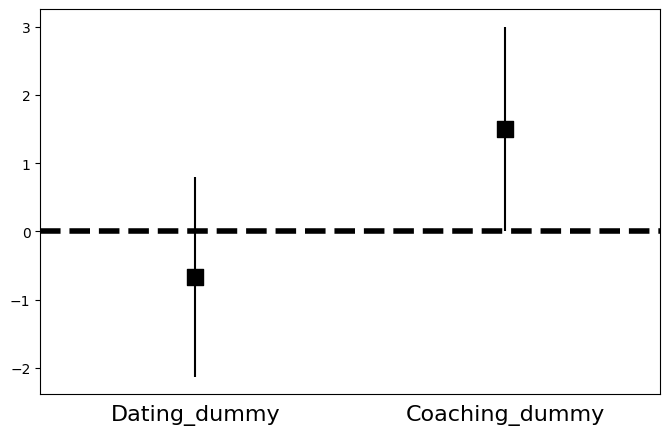

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar',
             ax=ax, color='none',
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]),
           marker='s', s=120,
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Dating_dummy', 'Coaching_dummy'],
                       rotation=0, fontsize=16)

While Kent Roy's dating status does not appear to significantly impact the likelihood of him saying the F-word more than 7 times in an episode, his coaching status does. Specifically, when Kent Roy is in a coaching role, he is more likely to cross that 7-time threshold.

# Conclusion and discussion

This study sought to understand the linguistic patterns of Kent Roy's use of the profanity 'f*ck' in the TV series "Ted Lasso," especially concerning the potential influence of external character conditions and their subsequent impact on the show's IMDb rating. Our findings revealed:

Kent Roy's dating status does not statistically significantly affect his propensity to use the F-word.
However, his coaching status does play a role. Kent Roy is more inclined to use the F-word when in a coaching role.
The adjusted R-squared of the linear regression model examining the relationship between the frequency of profanity and IMDb ratings is a mere 1.4%, indicating that the model explains only a small fraction of the variance in IMDb ratings. Moreover, the predictors in this model were not statistically significant at conventional levels.
The logistic regression, focusing on the likelihood of the profanity word being used more than seven times in an episode, highlighted a significant effect of the coaching status, whereas the dating status was deemed insignificant.

Discussion:

Television storytelling thrives on authenticity and character relatability. The subtle choices made in character dialogue can resonate differently with audiences. In the case of "Ted Lasso," Kent Roy's use of the F-word serves as an interesting linguistic marker to investigate.

It is intriguing that Kent Roy's dating status, a personal and emotional facet of a character's life, does not impact his use of profanity. On the other hand, his professional role as a coach seems to be a catalyst for increased use of the F-word. This suggests that, within the show's narrative, the pressures and dynamics of the coaching environment might bring out a more assertive or intense side of the character, leading to heightened profanity.

However, it's essential to note that this increase in the use of the F-word in episodes where Kent Roy coaches doesn't significantly influence the show's IMDb rating. This could imply that the audiences of "Ted Lasso" might be more accepting or neutral towards profanity, or perhaps, other factors, not examined in this study, play a more substantial role in influencing the IMDb ratings.

Furthermore, the logistic model reveals a heightened likelihood of episodes containing the profanity word more than seven times when Kent Roy is in a coaching role. This strengthens the notion of a relationship between coaching and the use of profanity, shedding light on potential character-driven narrative choices that content creators may harness for authenticity or dramatic effect.

In retrospect, the study underscores the nuanced interplay between character conditions, linguistic choices, and audience reception. While certain linguistic patterns might emerge tied to a character's environment or state, their impact on audience perception and ratings remains a multifaceted puzzle.

As future research avenues, it would be valuable to investigate other factors that might contribute to IMDb ratings. It could also be enriching to analyze the audience's qualitative feedback or delve into similar linguistic patterns in other characters or shows, thereby broadening the scope of understanding on this intriguing intersection of language and narrative in modern television.

# Outliers (bonus)

Identifying outliers is crucial for ensuring data quality, improving the performance and validity of statistical models, and gaining deeper insights into the underlying phenomenon. However, it's also essential to approach outlier detection and treatment judiciously, ensuring that genuine and significant data points are not inadvertently discarded.


We tested if the max value in variable 'F_count_RK' are outliers.

In [62]:
# Calculate the IQR for 'F_count_RK'
Q1 = df['F_count_RK'].quantile(0.25)
Q3 = df['F_count_RK'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("The outliers would be all values lower than", lower_bound, "and higher than", upper_bound,". Due to the characteristic of the variable, the lowest value can be 0.")

The outliers would be all values lower than -6.625 and higher than 24.375 . Due to the characteristic of the variable, the lowest value can be 0.


In [63]:
# Check how many values fall below the lower bound
outliers_below = (df['F_count_RK'] < lower_bound).sum()

# Check how many values fall above the upper bound
outliers_above = (df['F_count_RK'] > upper_bound).sum()

# Total number of outliers
total_outliers = outliers_below + outliers_above

print(f"Number of values below the lower bound: {outliers_below}")
print(f"Number of values above the upper bound: {outliers_above}")
print(f"Total number of outliers: {total_outliers}")


Number of values below the lower bound: 0
Number of values above the upper bound: 0
Total number of outliers: 0


# References

1. Lafreniere, K. C., Moore, S. G., & Fisher, R. J. (2022). The power of profanity: The meaning and impact of swear words in word of mouth. Journal of Marketing Research, 59(5), 908-925. SAGE Publications Sage CA: Los Angeles, CA.

2. Menghani, D. (2023). richmondway. GitHub repository. Retrieved from https://github.com/deepshamenghani/richmondway

3. Setiawan, S., & Ms, F. (2018). Swear Words among Males: The Social Functions and Pragmatic Meanings. In 2nd Social Sciences, Humanities and Education Conference: Establishing Identities through Language, Culture, and Education (SOSHEC 2018) (pp. 330-335). Atlantis Press.

4. Stapleton, K. (2010). 12. Swearing. In Interpersonal pragmatics, 6, 289. Walter de Gruyter.

5. Stephens, R., & Zile, A. (2017). Does emotional arousal influence swearing fluency? Journal of Psycholinguistic Research, 46, 983-995. Springer.

6. Stephens, R., & Robertson, O. (2020). Swearing as a response to pain: Assessing hypoalgesic effects of novel "swear" words. Frontiers in psychology, 11, 723. Frontiers.



